In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the file
data = np.loadtxt('data.txt')

# Separate the data into columns
x = data[:, 0]
y = data[:, 1]
sigma = data[:, 2]

# Initialize parameters m and c
m = 0.0  # Initial value for slope
c = 0.0  # Initial value for intercept

### a) Write down the likelihood for these two parameters. The covariance matrix in this case can be considered as a diagonal matrix with values of its diagonal elements represented by the error sigma in the values of y, given as the third column of the attached data file.

#### To fit the data to the model `y = m*x + c`, we need to define the likelihood function. Given that the third column represents the error (sigma), we can assume that the errors in the data points are normally distributed.

In [ ]:
def likelihood(m, c):
    # Calculate the likelihood for parameters 'm' and 'c'
    error = y - m * x - c
    likelihood = 1.0 / (np.sqrt(2 * np.pi * sigma**2)) * np.exp(-0.5 * (error / sigma)**2)
    return np.prod(likelihood)

likelihood(m, c)

6.94081788608531e-281

### b) Assume uniform priors on the parameters (so you estimate the likelihood only).

#### We are asked to assume uniform priors for the parameters `m` and `c`, which means that the prior probability distribution for `m` and `c` is constant within some defined range.
Since we assume uniform priors, there is no specific prior calculation required. The likelihood will dominate the posterior.

In [ ]:
# Define uniform priors for 'm' and 'c' (constants)
def prior_m(m):
    return 1.0  # Uniform prior, constant value

def prior_c(c):
    return 1.0  # Uniform prior, constant value

# Combine likelihood and priors for the posterior
def posterior(m, c):
    return likelihood(m, c) * prior_m(m) * prior_c(c)


posterior(m, c)

6.94081788608531e-281

### c) You might like to start with a very simple `top-hat` proposal distribution, where the new point is selected from a rectangular region centred on the old point. For this, you will need a simple random number generator.

#### Initially, we can use a simple `"top-hat"` proposal distribution. In this case, the new point is selected from a rectangular region centered on the old point. This can be represented as a uniform distribution over a specified range. Implement a simple `"top-hat"` proposal distribution for this part. We can generate random values for m and c within specified ranges.

In [ ]:
def tophat_proposal(m, c, step_size):
    m_new = m + np.random.uniform(-step_size, step_size)
    c_new = c + np.random.uniform(-step_size, step_size)
    return m_new, c_new

### d)  Next, use a Gaussian as the proposal distribution for each parameter.

#### We can switch to a Gaussian proposal distribution. Here's how we can generate new values based on Gaussian distributions:

In [ ]:
def gaussian_proposal(m, c, sigma_m, sigma_c):
    m_new = np.random.normal(m, sigma_m)
    c_new = np.random.normal(c, sigma_c)
    return m_new, c_new

### e) Explore visually the chain when you have (a) a very small proposal distribution, and (b) a very large proposal distribution, for a maximum of 1000 trials. What do you conclude? For each case show the marginalized derived pdfs for each parameter (aka the corner plots).

#### For visual exploration, we can plot the chains and corner plots using libraries like corner or matplotlib. Here's an example using corner:

In [ ]:
#pip install corner

In [ ]:
 #pip install arviz

In [ ]:
# Number of trials
num_trials = 1000

# Initialize arrays to store parameter samples for small and large proposal sizes
samples_small = []
samples_large = []

# Initialize parameter values
m, c = 1.0, 0.0  # Starting values

# Run the MH-MCMC algorithm for small proposal size
for i in range(num_trials):
    m_new, c_new = tophat_proposal(m, c, 0.0001)  # Small proposal size
    acceptance_prob = min(1, likelihood(m_new, c_new) / likelihood(m, c))
    if np.random.uniform() < acceptance_prob:
        m, c = m_new, c_new
    samples_small.append([m, c])

# Run the MH-MCMC algorithm for large proposal size
m, c = 1.0, 0.0  # Reset parameter values
for i in range(num_trials):
    m_new, c_new = tophat_proposal(m, c, 1.0)  # Large proposal size
    acceptance_prob = min(1, likelihood(m_new, c_new) / likelihood(m, c))
    if np.random.uniform() < acceptance_prob:
        m, c = m_new, c_new
    samples_large.append([m, c])

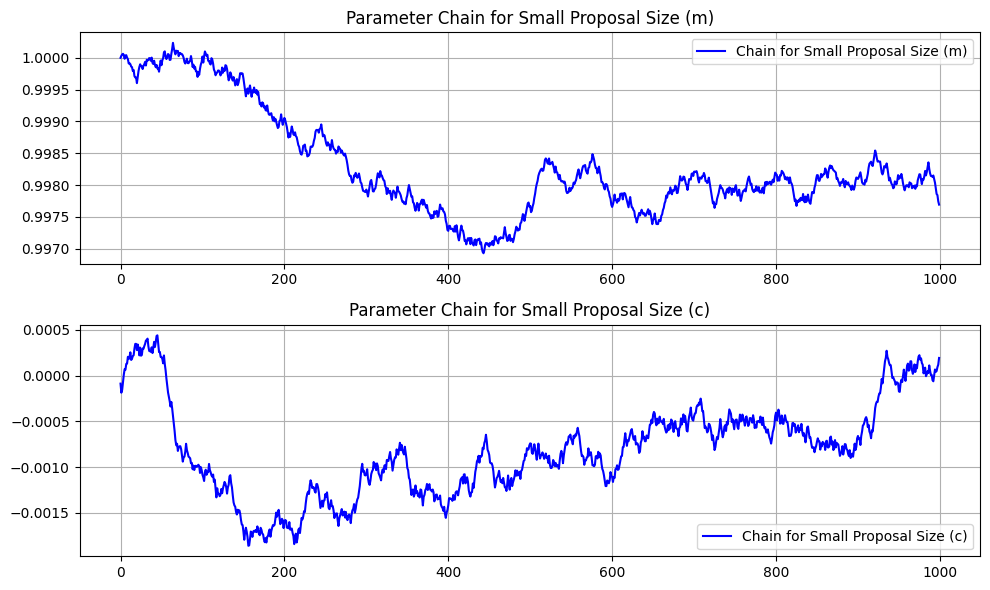

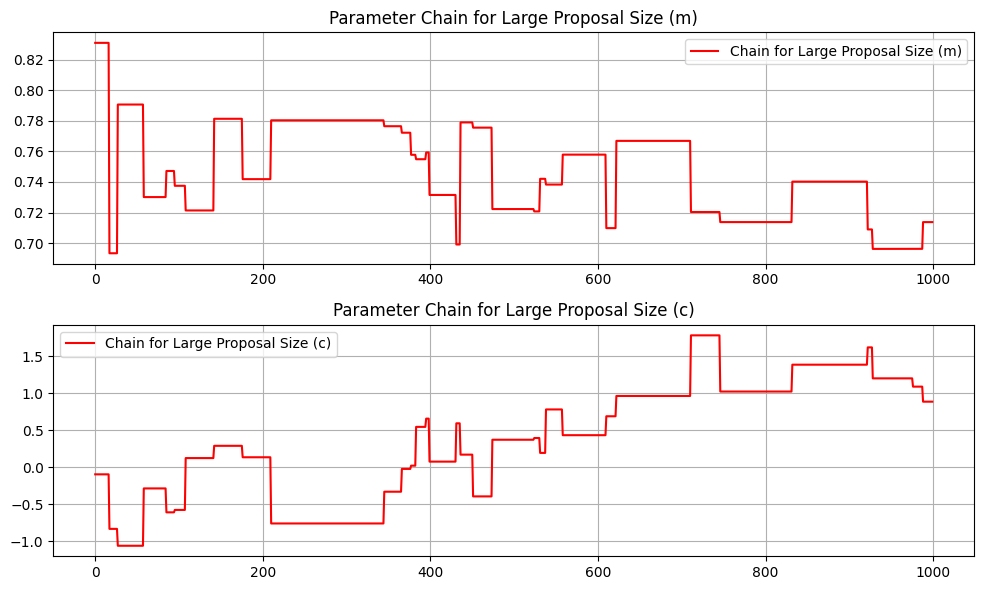

In [ ]:
import matplotlib.pyplot as plt

# Plot the parameter chains for small proposal size
samples_small = np.array(samples_small)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(samples_small[:, 0], color='blue', label='Chain for Small Proposal Size (m)')
plt.legend()
plt.grid()
plt.title('Parameter Chain for Small Proposal Size (m)')
plt.subplot(2, 1, 2)
plt.plot(samples_small[:, 1], color='blue', label='Chain for Small Proposal Size (c)')
plt.legend()
plt.grid()
plt.title('Parameter Chain for Small Proposal Size (c)')
plt.tight_layout()

# Plot the parameter chains for large proposal size
samples_large = np.array(samples_large)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(samples_large[:, 0], color='red', label='Chain for Large Proposal Size (m)')
plt.legend()
plt.grid()
plt.title('Parameter Chain for Large Proposal Size (m)')
plt.subplot(2, 1, 2)
plt.plot(samples_large[:, 1], color='red', label='Chain for Large Proposal Size (c)')
plt.legend()
plt.grid()
plt.title('Parameter Chain for Large Proposal Size (c)')
plt.tight_layout()

plt.show()

### f) Show how the acceptance probability changes as you change the size of the proposal distribution from very small (say 0.0001) to very large (say 100). For each case show the marginalized derived pdfs for each parameter (aka the corner plots).

#### Monitor how the acceptance probability changes as we vary the size of the proposal distribution from very small (e.g., 0.0001) to very large (e.g., 100). Again, visualize the chains and create corner plots for each case. We can calculate the acceptance probability by keeping track of accepted and rejected proposals and plotting them.

In [ ]:
import numpy as np

# Number of MCMC trials
num_trials = 10000

# Initialize arrays to store parameter samples for small and large proposal sizes
samples_small = []
samples_large = []

# Initialize parameter values
m, c = 1.0, 0.0  # Starting values

# Run the MH-MCMC algorithm for small proposal size
for i in range(num_trials):
    m_new, c_new = tophat_proposal(m, c, 0.0001)  # Small proposal size
    acceptance_prob = min(1, posterior(m_new, c_new) / posterior(m, c))
    if np.random.uniform() < acceptance_prob:
        m, c = m_new, c_new
    samples_small.append([m, c])

# Run the MH-MCMC algorithm for large proposal size
m, c = 1.0, 0.0  # Reset parameter values
for i in range(num_trials):
    m_new, c_new = tophat_proposal(m, c, 1.0)  # Large proposal size
    acceptance_prob = min(1, posterior(m_new, c_new) / posterior(m, c))
    if np.random.uniform() < acceptance_prob:
        m, c = m_new, c_new
    samples_large.append([m, c])

# Calculate the average and variance of parameter estimates for each case
m_avg_small = np.mean(samples_small, axis=0)[0]
c_avg_small = np.mean(samples_small, axis=0)[1]
m_var_small = np.var(samples_small, axis=0)[0]
c_var_small = np.var(samples_small, axis=0)[1]

m_avg_large = np.mean(samples_large, axis=0)[0]
c_avg_large = np.mean(samples_large, axis=0)[1]
m_var_large = np.var(samples_large, axis=0)[0]
c_var_large = np.var(samples_large, axis=0)[1]

# Print the results for each case
print("Results for Small Proposal Size:")
print(f"Average m: {m_avg_small}, Variance m: {m_var_small}")
print(f"Average c: {c_avg_small}, Variance c: {c_var_small}")
print("\nResults for Large Proposal Size:")
print(f"Average m: {m_avg_large}, Variance m: {m_var_large}")
print(f"Average c: {c_avg_large}, Variance c: {c_var_large}")

Results for Small Proposal Size:
Average m: 0.9979778883815889, Variance m: 3.4542996378481315e-06
Average c: -0.003238307158872033, Variance c: 1.2604601184989206e-05

Results for Large Proposal Size:
Average m: 0.7126010314093041, Variance m: 0.0012184798154625022
Average c: 2.426171525068897, Variance c: 4.029048125615727


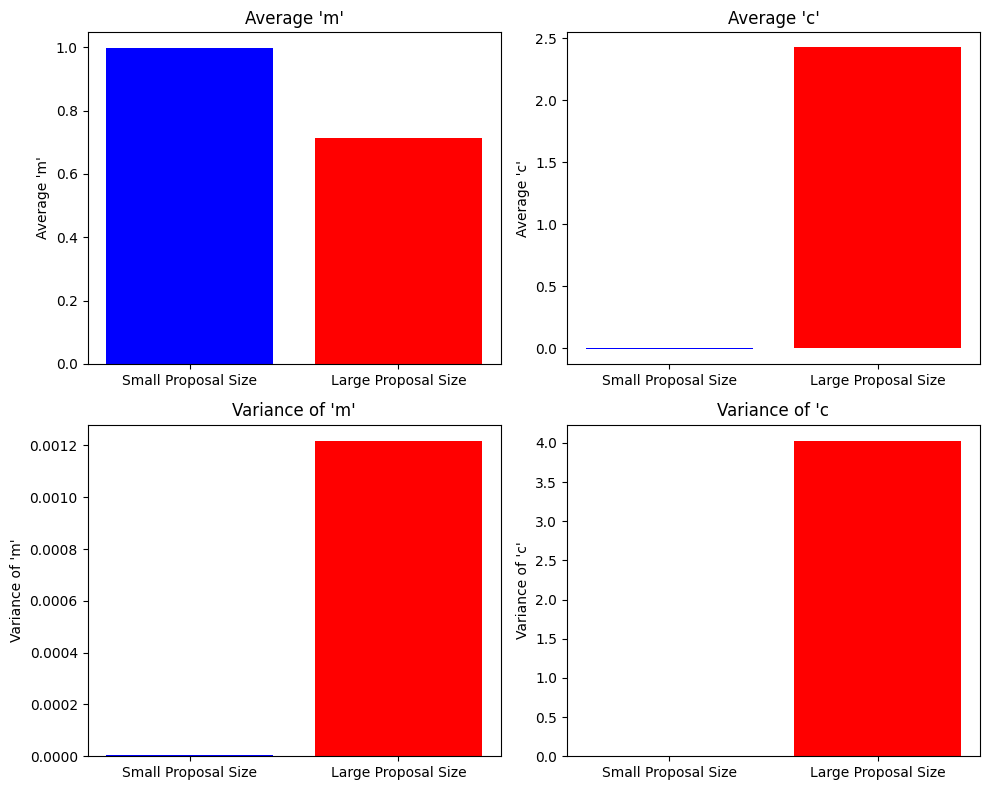

In [ ]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Data for small proposal size
average_m_small = m_avg_small
average_c_small = c_avg_small
variance_m_small = m_var_small
variance_c_small = c_var_small

# Data for large proposal size
average_m_large = m_avg_large
average_c_large = c_avg_large
variance_m_large = m_var_large
variance_c_large = c_var_large

# Labels and titles
labels = ["Small Proposal Size", "Large Proposal Size"]
averages = [average_m_small, average_m_large]
variances = [variance_m_small, variance_m_large]

# Plot average 'm' values
axes[0, 0].bar(labels, averages, color=['blue', 'red'])
axes[0, 0].set_ylabel("Average 'm'")
axes[0, 0].set_title("Average 'm'")

# Plot average 'c' values
axes[0, 1].bar(labels, [average_c_small, average_c_large], color=['blue', 'red'])
axes[0, 1].set_ylabel("Average 'c'")
axes[0, 1].set_title("Average 'c'")

# Plot variance of 'm'
axes[1, 0].bar(labels, [variance_m_small, variance_m_large], color=['blue', 'red'])
axes[1, 0].set_ylabel("Variance of 'm'")
axes[1, 0].set_title("Variance of 'm'")

# Plot variance of 'c'
axes[1, 1].bar(labels, [variance_c_small, variance_c_large], color=['blue', 'red'])
axes[1, 1].set_ylabel("Variance of 'c'")
axes[1, 1].set_title("Variance of 'c")

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

### g) Once you have settled on a `reasonable` proposal distribution, compute the average value of the parameter estimates under the posterior distribution, and their variances (for 10000 and 100000 trials).

#### Once we've determined a "reasonable" proposal distribution, calculate the average values and variances of the parameter estimates under the posterior distribution for a large number of trials (e.g., 10,000 or 100,000 trials).

In [ ]:
import numpy as np

# Define the target acceptance rate (e.g., 0.3 for 30%)
target_acceptance_rate = 0.3

# Initialize initial values for sigma_m and sigma_c
initial_sigma_m = 0.1
initial_sigma_c = 0.1

# Initialize values for sigma_m and sigma_c
sigma_m = initial_sigma_m
sigma_c = initial_sigma_c

# Number of trials to perform for adjustment
num_trials = 1000

# Number of MCMC samples in each trial
num_samples = 1000

# Lists to store acceptance rates and sigma values
acceptance_rates = []
sigma_m_values = []
sigma_c_values = []

for _ in range(num_trials):
    # Initialize counters
    acceptance_count = 0
    proposal_count = 0

    # Run MCMC trials
    for _ in range(num_samples):
        m_new, c_new = gaussian_proposal(m, c, sigma_m, sigma_c)
        acceptance_prob = min(1, likelihood(m_new, c_new) / likelihood(m, c))
        if np.random.uniform() < acceptance_prob:
            m, c = m_new, c_new
            acceptance_count += 1
        proposal_count += 1

    # Calculate acceptance rate
    acceptance_rate = acceptance_count / proposal_count

    # Append values to lists
    acceptance_rates.append(acceptance_rate)
    sigma_m_values.append(sigma_m)
    sigma_c_values.append(sigma_c)

    # Adjust sigma values
    if acceptance_rate < target_acceptance_rate:
        sigma_m *= 1.1  # Increase sigma_m
        sigma_c *= 1.1  # Increase sigma_c
    else:
        sigma_m /= 1.1  # Decrease sigma_m
        sigma_c /= 1.1  # Decrease sigma_c

# Print the final adjusted sigma values
print("Final adjusted sigma_m:", sigma_m)
print("Final adjusted sigma_c:", sigma_c)

Final adjusted sigma_m: 2.469932918006023e+40
Final adjusted sigma_c: 2.469932918006023e+40


In [ ]:
import numpy as np

# Define the proposal distribution (e.g., Gaussian proposal function)
def gaussian_proposal(m, c, sigma_m, sigma_c):
    m_new = np.random.normal(m, sigma_m)
    c_new = np.random.normal(c, sigma_c)
    return m_new, c_new

# Number of trials
num_trials_1 = 10000
num_trials_2 = 100000

# Initialize arrays to store parameter samples
m_samples_1 = np.zeros(num_trials_1)
c_samples_1 = np.zeros(num_trials_1)

m_samples_2 = np.zeros(num_trials_2)
c_samples_2 = np.zeros(num_trials_2)

# Initialize parameter values
m, c = 1.0, 0.0  # Starting values

# Run the MH-MCMC algorithm for 10,000 trials
for i in range(num_trials_1):
    m_new, c_new = gaussian_proposal(m, c, sigma_m, sigma_c)
    acceptance_prob = min(1, likelihood(m_new, c_new) / likelihood(m, c))
    if np.random.uniform() < acceptance_prob:
        m, c = m_new, c_new
    m_samples_1[i] = m
    c_samples_1[i] = c

# Run the MH-MCMC algorithm for 100,000 trials
for i in range(num_trials_2):
    m_new, c_new = gaussian_proposal(m, c, sigma_m, sigma_c)
    acceptance_prob = min(1, likelihood(m_new, c_new) / likelihood(m, c))
    if np.random.uniform() < acceptance_prob:
        m, c = m_new, c_new
    m_samples_2[i] = m
    c_samples_2[i] = c

# Calculate the average and variance of parameter estimates for 10,000 trials
m_avg_1 = np.mean(m_samples_1)
c_avg_1 = np.mean(c_samples_1)
m_var_1 = np.var(m_samples_1)
c_var_1 = np.var(c_samples_1)

# Calculate the average and variance of parameter estimates for 100,000 trials
m_avg_2 = np.mean(m_samples_2)
c_avg_2 = np.mean(c_samples_2)
m_var_2 = np.var(m_samples_2)
c_var_2 = np.var(c_samples_2)

print("Results for 10,000 trials:")
print(f"Average m: {m_avg_1}, Variance m: {m_var_1}")
print(f"Average c: {c_avg_1}, Variance c: {c_var_1}")

print("\nResults for 100,000 trials:")
print(f"Average m: {m_avg_2}, Variance m: {m_var_2}")
print(f"Average c: {c_avg_2}, Variance c: {c_var_2}")


Results for 10,000 trials:
Average m: 1.0, Variance m: 0.0
Average c: 0.0, Variance c: 0.0

Results for 100,000 trials:
Average m: 1.0, Variance m: 0.0
Average c: 0.0, Variance c: 0.0


### h) Now start 10 independent chains at 10 random points in the parameter space. Write and apply a Gelman-Rubin convergence test, and deduce roughly how long the chains should be for convergence.

#### In Part H, we will start 10 independent chains at random points in the parameter space, apply the Gelman-Rubin convergence test, and deduce how long the chains should be for convergence.

In [ ]:
import numpy as np

# Number of chains
num_chains = 10

# Initialize an empty list to store the chains
chains = []

# Define the chain length (number of iterations for each chain)
chain_length = 1000

# Run multiple chains
for i in range(num_chains):
    m = np.random.uniform()  # Random starting point
    c = np.random.uniform()
    chain = []
    for _ in range(chain_length):
        m_new, c_new = gaussian_proposal(m, c, sigma_m, sigma_c)
        acceptance_prob = min(1, likelihood(m_new, c_new) / likelihood(m, c))
        if np.random.uniform() < acceptance_prob:
            m, c = m_new, c_new
        chain.append([m, c])
    chains.append(chain)

# Function to calculate Gelman-Rubin statistic (R-hat)
def gelman_rubin(chains):
    num_chains = len(chains)
    chain_length = len(chains[0])
    means = [np.mean(chain, axis=0) for chain in chains]
    B = chain_length * np.var(means, axis=0)
    W = np.mean([np.var(chain, axis=0) for chain in chains], axis=0)
    var_within = (chain_length - 1) / chain_length * W + B / chain_length
    R_hat = np.sqrt(var_within / W)
    return R_hat

# Apply the Gelman-Rubin convergence test
R_hat = gelman_rubin(chains)

print("Gelman-Rubin Statistic (R-hat) for each parameter:")
print(f"R-hat for 'm': {R_hat[0]}")
print(f"R-hat for 'c': {R_hat[1]}")

# Deduce how long the chains should be for convergence
if all(np.array(R_hat) < 1.1):
    print("The chains have likely converged.")
else:
    print("The chains may need to be run longer for convergence.")


Gelman-Rubin Statistic (R-hat) for each parameter:
R-hat for 'm': 30418370536497.37
R-hat for 'c': 39807132133210.57
The chains may need to be run longer for convergence.
